# import data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
data=pd.read_csv('C:/Users/HP/Downloads/delivery_time.csv')

In [179]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:

data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [7]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# correlation

Text(0, 0.5, 'Delivery Time')

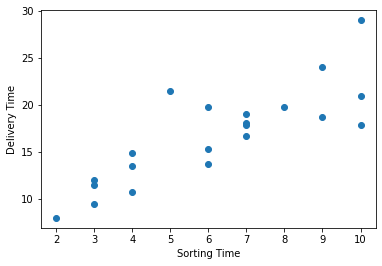

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter("Sorting Time","Delivery Time",data=data)
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

In [9]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

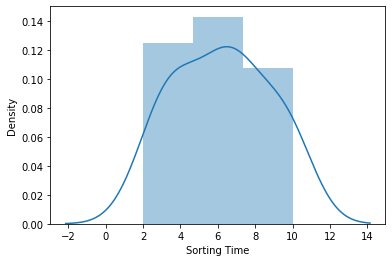

In [10]:

sns.distplot(data['Sorting Time'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

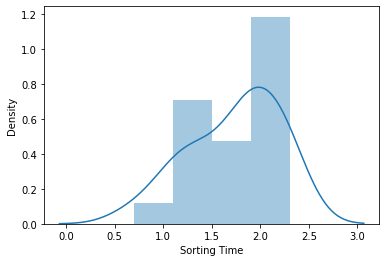

In [11]:
sns.distplot(np.log(data['Sorting Time']))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

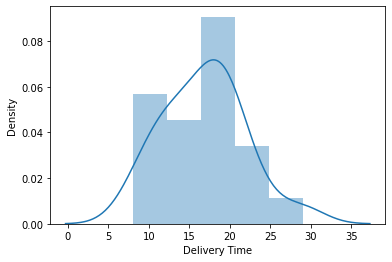

In [12]:
sns.distplot(data['Delivery Time'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

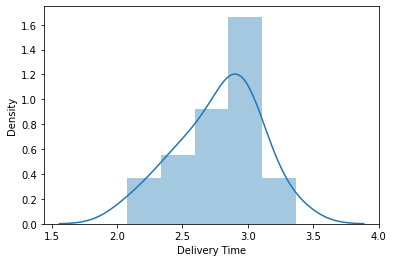

In [13]:
sns.distplot(np.log(data['Delivery Time']))

array([[<AxesSubplot:title={'center':'Delivery Time'}>,
        <AxesSubplot:title={'center':'Sorting Time'}>]], dtype=object)

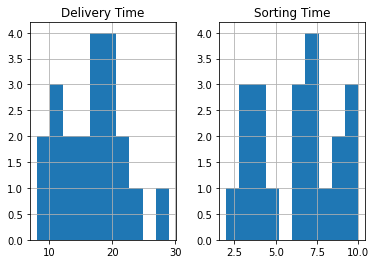

In [14]:
data.hist()

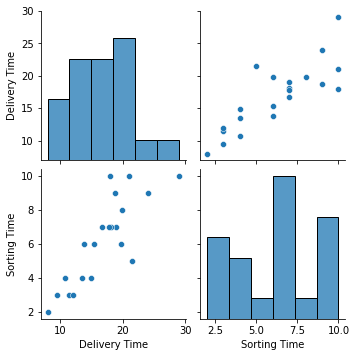

In [15]:
sns.pairplot(data)

<AxesSubplot:>

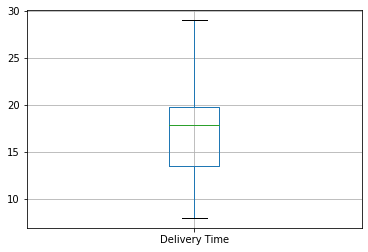

In [16]:
data.boxplot('Delivery Time')

<AxesSubplot:>

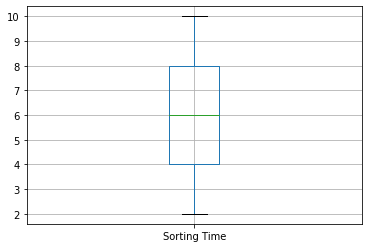

In [17]:
data.boxplot('Sorting Time')

In [180]:
data1=data.rename({'Delivery Time':'DT','Sorting Time':'ST'},axis=1)

In [181]:
data1

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [191]:
import statsmodels.formula.api as smf
models=smf.ols(("dt~dy"),data=data1).fit()

In [192]:
dt=np.log(data1.DT)
dy=np.log(data1.ST)

In [193]:
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           1.60e-07
Time:                        01:34:06   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
dy             0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
def rsme(actual,predict):
    temp=np.sqrt(np.mean((actual-prediction)*(actual-prediction)))
    return temp

In [156]:
prediction=np.exp(models.predict(data1))
prediction

0     1.048208e+10
1     5.290370e+05
2     1.431550e+07
3     2.015056e+09
4     1.048208e+10
5     1.431550e+07
6     7.446749e+07
7     1.017011e+05
8     1.048208e+10
9     2.015056e+09
10    3.873709e+08
11    5.290370e+05
12    7.446749e+07
13    1.017011e+05
14    1.017011e+05
15    5.290370e+05
16    1.431550e+07
17    7.446749e+07
18    1.955084e+04
19    7.446749e+07
20    2.751986e+06
dtype: float64

In [157]:
rsme(data1.DT,prediction)

4011387057.188567